In [1]:
#Import the necessary modules. For data:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from datetime import datetime, date
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# For visualization:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For regressions:
import statsmodels.formula.api as smf
import statsmodels.tsa.stattools as ts
import patsy
import math

# For stationarity, cointegration, distribution, and causality tests:
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.tsa.api import VAR, DynamicVAR
import scipy.stats as stats

In [2]:
#Import data

df=pd.read_csv('webSemiannual.csv')

In [3]:
#df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date         object
Sales         int64
Internet    float64
CPI         float64
GDP           int64
dtype: object

In [4]:
df.head()

,Date,Sales,Internet,CPI,GDP
0,12/31/2002,25023,0.06700,180.9,25995200
1,6/30/2003,28566,0.08000,183.3,26524500
2,12/31/2003,32304,0.09586,184.6,27135200
3,6/30/2004,36004,0.10942,187.6,27537000
4,12/31/2004,40460,0.12791,190.2,28049500


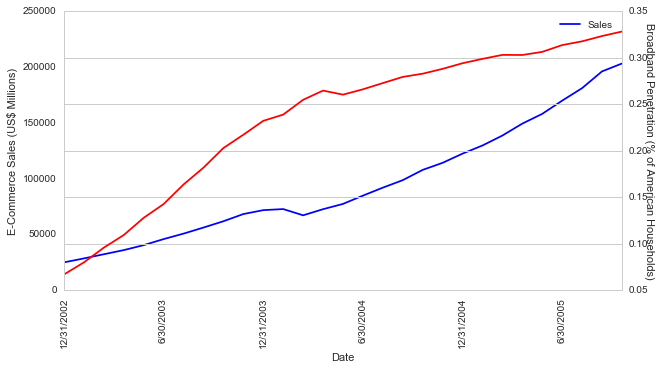

In [5]:
fig, ax = plt.subplots()
plt.hold(True)
df['Sales'].plot(ax=ax,color='blue',figsize=(10,5))
df['Internet'].plot(x='Date',secondary_y=True,color='red',ls='-')
ax.set_xlabel('Date')
ax.set_xticklabels(df.Date, rotation=90)
ax.set_ylabel('E-Commerce Sales (US$ Millions)')
plt.ylabel('Broadband Penetration (% of American Households)',rotation=-90)
ax.legend(loc='best')

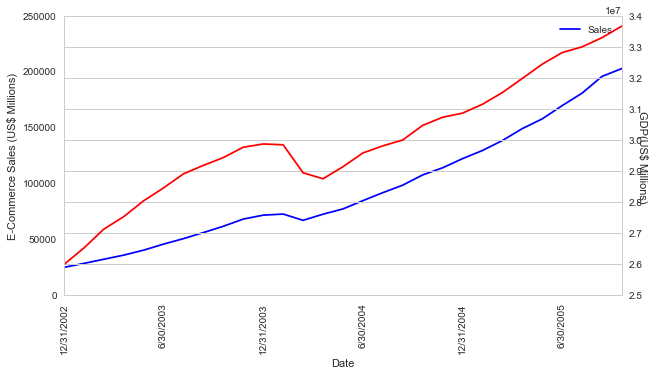

In [6]:
fig, ax = plt.subplots()
plt.hold(True)
df['Sales'].plot(ax=ax,color='blue',figsize=(10,5))
df['GDP'].plot(x='Date',secondary_y=True,color='red',ls='-')
ax.set_xlabel('Date')
ax.set_xticklabels(df.Date, rotation=90)
ax.set_ylabel('E-Commerce Sales (US$ Millions)')
plt.ylabel('GDP(US$ Millions)',rotation=-90)
ax.legend(loc='best')

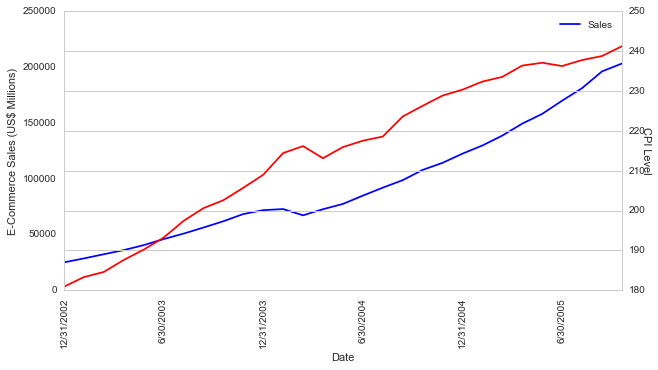

In [7]:
fig, ax = plt.subplots()
plt.hold(True)
df['Sales'].plot(ax=ax,color='blue',figsize=(10,5))
df['CPI'].plot(x='Date',secondary_y=True,color='red',ls='-')
ax.set_xlabel('Date')
ax.set_xticklabels(df.Date, rotation=90)
ax.set_ylabel('E-Commerce Sales (US$ Millions)')
plt.ylabel('CPI Level',rotation=-90)
ax.legend(loc='best')

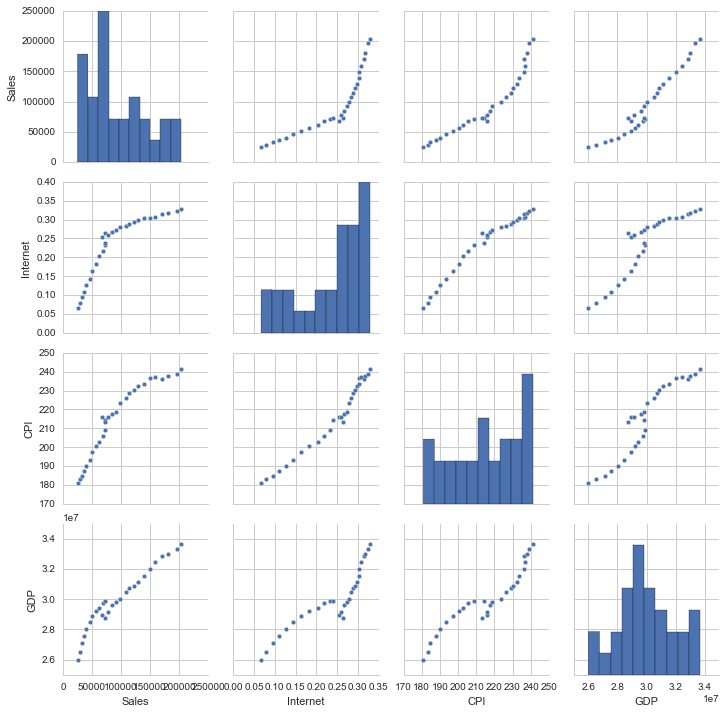

In [8]:
#A peek at how the data points relate to each other

sns.pairplot(data=df[['Sales','Internet', 'CPI','GDP']])

In [9]:
reg1 = smf.ols(formula='Sales ~ Internet + CPI + GDP', data=df).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     272.2
Date:                Thu, 27 Jul 2017   Prob (F-statistic):           3.30e-19
Time:                        11:20:20   Log-Likelihood:                -304.70
No. Observations:                  29   AIC:                             617.4
Df Residuals:                      25   BIC:                             622.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -9.4e+05   7.35e+04    -12.793      0.000     -1.09e+06 -7.89e+05
Internet   -5.235e+05   1.13e+05     -4.632      0.000     -7.56e+05 -2.91e+05
CPI         3118.9581    604.414      5.160      0.000      1874.145  4363.771
GDP            0.0163      0.003      5.903      0.000         0.011     0.022
==============================================================================
Omnibus:                        1.784   Durbin-Watson:                   0.710
Prob(Omnibus):                  0.410   Jarque-Bera (JB):                1.604
Skew:                           0.528   Prob(JB):                        0.448
Kurtosis:                       2.540   Cond. No.                     2.24e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
#Add columns to capture the percent change of each variable from one period to the next
df['deltaSales']=df['Sales'].pct_change()
df['deltaInternet']=df['Internet'].pct_change()
df['deltaGDP']=df['GDP'].pct_change()
df['deltaCPI']=df['CPI'].pct_change()

In [11]:
df.head()

,Date,Sales,Internet,CPI,GDP,deltaSales,deltaInternet,deltaGDP,deltaCPI
0,12/31/2002,25023,0.06700,180.9,25995200,NaN,NaN,NaN,NaN
1,6/30/2003,28566,0.08000,183.3,26524500,0.141590,0.194030,0.020361,0.013267
2,12/31/2003,32304,0.09586,184.6,27135200,0.130855,0.198250,0.023024,0.007092
3,6/30/2004,36004,0.10942,187.6,27537000,0.114537,0.141456,0.014807,0.016251
4,12/31/2004,40460,0.12791,190.2,28049500,0.123764,0.168982,0.018611,0.013859


In [12]:
reg2 = smf.ols(formula='deltaSales ~ deltaInternet + deltaCPI + deltaGDP', data=df).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             deltaSales   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     33.28
Date:                Thu, 27 Jul 2017   Prob (F-statistic):           1.02e-08
Time:                        11:20:20   Log-Likelihood:                 72.092
No. Observations:                  28   AIC:                            -136.2
Df Residuals:                      24   BIC:                            -130.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         0.0435      0.007      6.177      0.000         0.029     0.058
deltaInternet     0.2426      0.066      3.699      0.001         0.107     0.378
deltaCPI         -0.9479      0.502     -1.889      0.071        -1.984     0.088
deltaGDP          3.2412      0.405      8.004      0.000         2.405     4.077
==============================================================================
Omnibus:                        0.164   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.921   Jarque-Bera (JB):                0.327
Skew:                          -0.147   Prob(JB):                        0.849
Kurtosis:                       2.560   Cond. No.                         135.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
reg3 = smf.ols(formula='deltaSales ~ deltaInternet + deltaGDP', data=df).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             deltaSales   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     43.66
Date:                Thu, 27 Jul 2017   Prob (F-statistic):           6.98e-09
Time:                        11:20:20   Log-Likelihood:                 70.152
No. Observations:                  28   AIC:                            -134.3
Df Residuals:                      25   BIC:                            -130.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         0.0362      0.006      5.856      0.000         0.023     0.049
deltaInternet     0.2140      0.067      3.192      0.004         0.076     0.352
deltaGDP          3.1549      0.423      7.467      0.000         2.285     4.025
==============================================================================
Omnibus:                        3.743   Durbin-Watson:                   2.230
Prob(Omnibus):                  0.154   Jarque-Bera (JB):                2.166
Skew:                           0.484   Prob(JB):                        0.339
Kurtosis:                       3.960   Cond. No.                         107.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#Test for stationarity; Null hypothesis: Non-Stationary
def ADF(timeseries):
    print 'Results of Augmented Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

In [15]:
ADF(df['deltaSales'][1:])

Results of Augmented Dickey-Fuller Test:
Test Statistic                 -2.994795
p-value                         0.035383
#Lags Used                      0.000000
Number of Observations Used    27.000000
Critical Value (5%)            -2.976430
Critical Value (1%)            -3.699608
Critical Value (10%)           -2.627601
dtype: float64


In [16]:
ADF(df['deltaInternet'][1:])

Results of Augmented Dickey-Fuller Test:
Test Statistic                 -3.226508
p-value                         0.018501
#Lags Used                      3.000000
Number of Observations Used    24.000000
Critical Value (5%)            -2.992216
Critical Value (1%)            -3.737709
Critical Value (10%)           -2.635747
dtype: float64


In [17]:
ADF(df['deltaGDP'][1:])

Results of Augmented Dickey-Fuller Test:
Test Statistic                 -3.177360
p-value                         0.021333
#Lags Used                      1.000000
Number of Observations Used    26.000000
Critical Value (5%)            -2.981247
Critical Value (1%)            -3.711212
Critical Value (10%)           -2.630095
dtype: float64


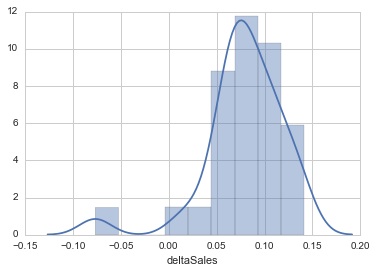

In [18]:
sns.distplot(df['deltaSales'].loc[1:])

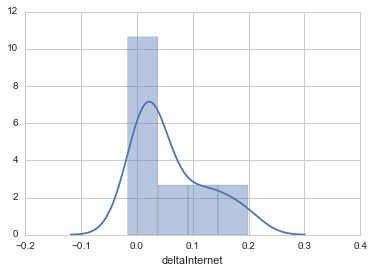

In [19]:
sns.distplot(df['deltaInternet'].loc[1:])

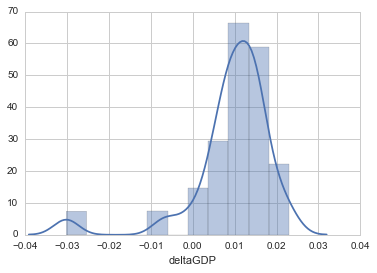

In [20]:
sns.distplot(df['deltaGDP'].loc[1:])

In [21]:
stats.normaltest(df['deltaSales'].loc[1:])

NormaltestResult(statistic=21.677510450953438, pvalue=1.962403974906779e-05)

In [22]:
stats.normaltest(df['deltaInternet'].loc[1:])

NormaltestResult(statistic=4.9527881970159129, pvalue=0.08404574050600884)

In [23]:
stats.normaltest(df['deltaGDP'].loc[1:])

NormaltestResult(statistic=32.855461230104396, pvalue=7.3371473957084164e-08)

In [24]:
#Test for Granger Causality with deltaInternet; Null hypothesis: x2 is not Granger causal for x1
data = np.asarray(df[['deltaSales', 'deltaInternet']][1:])
model = VAR(data)
results = model.fit(2)

results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 27, Jul, 2017
Time:                     11:20:21
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -14.0772
Nobs:                     26.0000    HQIC:                  -14.4218
Log likelihood:           125.510    FPE:                4.79067e-07
AIC:                     -14.5611    Det(Omega_mle):     3.36992e-07
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.033999         0.016851            2.018           0.057
L1.y1         0.375219         0.215029            1.745           0.096
L1.y2         0.549120         0.285894            1.921           0.068
L2.y1         0.022332

In [25]:
results.test_causality('y1','y2', kind='f')

Granger causality f-test
   Test statistic   Critical Value          p-value        df
-------------------------------------------------------------
         2.060953         3.219942            0.140  (2, 42L)
H_0: ['y2'] do not Granger-cause y1
Conclusion: fail to reject H_0 at 5.00% significance level


{'conclusion': 'fail to reject',
 'crit_value': 3.219942293176123,
 'df': (2, 42L),
 'pvalue': 0.14001773110604038,
 'signif': 0.05,
 'statistic': 2.060952720704309}

In [26]:
results.test_causality('y2','y1', kind='f')

Granger causality f-test
   Test statistic   Critical Value          p-value        df
-------------------------------------------------------------
         6.380127         3.219942            0.004  (2, 42L)
H_0: ['y1'] do not Granger-cause y2
Conclusion: reject H_0 at 5.00% significance level


{'conclusion': 'reject',
 'crit_value': 3.219942293176123,
 'df': (2, 42L),
 'pvalue': 0.0038059278911293493,
 'signif': 0.05,
 'statistic': 6.3801270324343085}

In [27]:
#Test for Granger Causality with deltaGDP; Null hypothesis: x2 is not Granger causal for x1
data = np.asarray(df[['deltaSales', 'deltaGDP']][1:])
model = VAR(data)
results2 = model.fit(2)

results2.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 27, Jul, 2017
Time:                     11:20:22
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -16.5127
Nobs:                     26.0000    HQIC:                  -16.8572
Log likelihood:           157.171    FPE:                4.19468e-08
AIC:                     -16.9966    Det(Omega_mle):     2.95068e-08
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.015721         0.024133            0.651           0.522
L1.y1         0.687965         0.349313            1.969           0.062
L1.y2        -1.832073         1.600765           -1.144           0.265
L2.y1         0.242892

In [28]:
results2.test_causality('y1','y2', kind='f')

Granger causality f-test
   Test statistic   Critical Value          p-value        df
-------------------------------------------------------------
         0.656650         3.219942            0.524  (2, 42L)
H_0: ['y2'] do not Granger-cause y1
Conclusion: fail to reject H_0 at 5.00% significance level


{'conclusion': 'fail to reject',
 'crit_value': 3.219942293176123,
 'df': (2, 42L),
 'pvalue': 0.52382757432589189,
 'signif': 0.05,
 'statistic': 0.65664999817926828}

In [29]:
results2.test_causality('y2','y1', kind='f')

Granger causality f-test
   Test statistic   Critical Value          p-value        df
-------------------------------------------------------------
         1.745160         3.219942            0.187  (2, 42L)
H_0: ['y1'] do not Granger-cause y2
Conclusion: fail to reject H_0 at 5.00% significance level


{'conclusion': 'fail to reject',
 'crit_value': 3.219942293176123,
 'df': (2, 42L),
 'pvalue': 0.18704080665303571,
 'signif': 0.05,
 'statistic': 1.7451597563160097}

In [30]:
#Test for cointegration: Engle-Granger 2 Step Approach; Null hypothesis: Residuals are non-stationary --> no cointegration

reg4 = smf.ols(formula='deltaSales ~ deltaInternet', data=df.loc[1:]).fit()
df['internetResid']=reg4.resid
ADF(df['internetResid'][1:])

Results of Augmented Dickey-Fuller Test:
Test Statistic                 -3.805726
p-value                         0.002849
#Lags Used                      0.000000
Number of Observations Used    27.000000
Critical Value (5%)            -2.976430
Critical Value (1%)            -3.699608
Critical Value (10%)           -2.627601
dtype: float64


In [31]:
#Test for cointegration: Engle-Granger 2 Step Approach; Null hypothesis: Residuals are non-stationary --> no cointegration

reg5 = smf.ols(formula='deltaSales ~ deltaGDP', data=df.loc[1:]).fit()
df['GDPResid']=reg5.resid
ADF(df['GDPResid'][1:])

Results of Augmented Dickey-Fuller Test:
Test Statistic                 -4.095113
p-value                         0.000987
#Lags Used                      0.000000
Number of Observations Used    27.000000
Critical Value (5%)            -2.976430
Critical Value (1%)            -3.699608
Critical Value (10%)           -2.627601
dtype: float64
